**Library import**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
plt.style.use("ggplot")

**Data import**

In [2]:
# all the different dataframes are putted inside a list
# list is then concatenated to one data set
# adapt the columns 

# read the different files
path = r"C:\Users\BrechtDewilde\Documents\Github\BDProject\data"
data_set_locations = [path + "\\batch" + str(i) + ".DAT" for i in range(1, 11)]
data_sets = [pd.read_csv(i, header = None) for i in data_set_locations]

# assign column with correct batch number to each dataset
batches = list(range(1, 11))
for df, batch in zip(data_sets, batches):
    df.insert(0, "batch", batch)
    
# create one dataset
data = pd.concat(data_sets)

# assign correct columnnames 
colnames = ["S{}F{}".format(f, s) for f in range(1, 17) for s in range(1, 9)]
colnames.insert(0, "batch")
colnames.insert(1, "gas")
colnames.insert(2, "concentration")
data.columns = colnames

In [3]:
data.head()

,batch,gas,concentration,S1F1,S1F2,S1F3,S1F4,S1F5,S1F6,S1F7,...,S15F7,S15F8,S16F1,S16F2,S16F3,S16F4,S16F5,S16F6,S16F7,S16F8
0,1,Ethanol,10.0,15596.1621,1.868245,2.371604,2.803678,7.512213,-2.739388,-3.344671,...,-1.071137,-3.037772,3037.0390,3.972203,0.527291,0.728443,1.445783,-0.545079,-0.902241,-2.654529
1,1,Ethanol,20.0,26402.0704,2.532401,5.411209,6.509906,7.658469,-4.722217,-5.817651,...,-1.530519,-1.994993,4176.4453,4.281373,0.980205,1.628050,1.951172,-0.889333,-1.323505,-1.749225
2,1,Ethanol,30.0,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,...,-2.384784,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370
3,1,Ethanol,40.0,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,...,-2.607199,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957
4,1,Ethanol,50.0,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,...,-3.594763,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756


**Data cleaning**

In [4]:
# how much missing values do we have?
print("The amount of missing values: {}".format(len(data.isna().sum()[data.isna().sum() > 0])))

The amount of missing values: 0


**Export data**

In [5]:
 data.to_csv('data.csv')

In [6]:
ethanol = data.loc[data['gas'] == "Ethanol"]
ethylene = data.loc[data['gas'] == "Ethylene"]
ammonia = data.loc[data['gas'] == "Ammonia"]
acetaldehyde = data.loc[data['gas'] == "Acetaldehyde"]
acetone = data.loc[data['gas'] == "Acetone"]
toluene = data.loc[data['gas'] == "Toluene"]
gases = [ethanol, ethylene, ammonia, acetaldehyde, acetone, toluene]

### Exploratory Data analysis

**General characteristics** <br/>
1) Data shape <br/>
2) observations for each gas

In [7]:
data.shape

(13910, 131)

In [8]:
# The number of observations for each gas type
[i.shape[0] for i in gases]

[2565, 2926, 1641, 1936, 3009, 1833]

**Analysis of the target variable**

In [9]:
y = data["concentration"]
print("Different concentration values: {}".format(len(y.unique())))
print("Ranging from {} - {}".format(min(y), max(y)))

Different concentration values: 59
Ranging from 1.0 - 1000.0


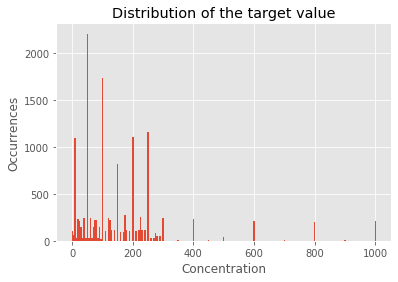

In [10]:
y = data["concentration"]
counts = pd.DataFrame(y.value_counts(False)).sort_index(axis = 0)
fig, ax = plt.subplots()
ax.bar(counts.index, counts["concentration"].values.tolist(), width = 5)
ax.set_xlabel("Concentration")
ax.set_ylabel("Occurrences")
ax.set_title("Distribution of the target value")
fig.savefig('pics/target_distribution.png', format='png', dpi=1200)

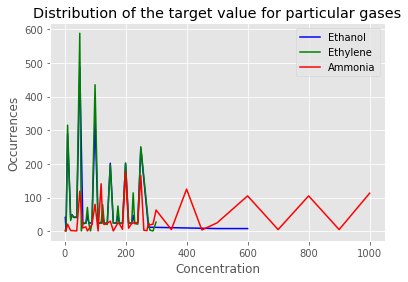

In [11]:
gases_name = ["ethanol", "ethylene", "ammonia", "acetaldehyde", "acetone", "toluene"]
colors = ["blue", "green", "red", "cyan", "magenta", "yellow"]
fig, ax = plt.subplots()

for index,df in enumerate(gases[:3]):
    name = df["gas"].tolist()[0]
    y = df["concentration"]
    counts = pd.DataFrame(y.value_counts(False)).sort_index(axis = 0)
    ax.plot(counts.index, counts["concentration"].values.tolist(), color = colors[index], label = name)
    ax.set_xlabel("Concentration")
    ax.set_ylabel("Occurrences")
ax.set_title("Distribution of the target value for particular gases")
ax.legend()
fig.savefig('pics/target_distribution_gas13.png', format='png', dpi=1200)

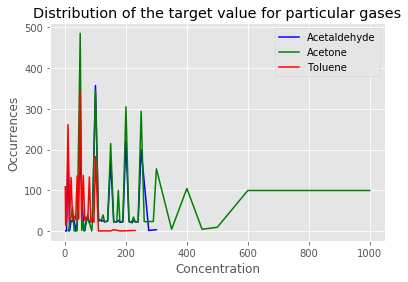

In [12]:
fig, ax = plt.subplots()

for index,df in enumerate(gases[3:]):
    name = df["gas"].tolist()[0]
    y = df["concentration"]
    counts = pd.DataFrame(y.value_counts(False)).sort_index(axis = 0)
    ax.plot(counts.index, counts["concentration"].values.tolist(), color = colors[index], label = name)
    ax.set_xlabel("Concentration")
    ax.set_ylabel("Occurrences")
ax.set_title("Distribution of the target value for particular gases")
ax.legend()
fig.savefig('pics/target_distribution_gas36.png', format='png', dpi=1200)

**Analysis of the numeric features**

In [13]:
# what does the summary says?
x = data.iloc[:,3:]
means = pd.DataFrame(x.describe()).iloc[1:2].values.tolist()[0]
std = pd.DataFrame(x.describe()).iloc[2:3].values.tolist()[0]
x.describe()

,S1F1,S1F2,S1F3,S1F4,S1F5,S1F6,S1F7,S1F8,S2F1,S2F2,...,S15F7,S15F8,S16F1,S16F2,S16F3,S16F4,S16F5,S16F6,S16F7,S16F8
count,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,...,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000,13910.000000
mean,50435.066174,6.638156,12.936688,18.743953,26.890695,-9.158655,-14.402383,-59.927598,57340.104585,6.648033,...,-9.601927,-19.136500,19688.565373,6.072066,7.138634,14.929364,19.090980,-4.901016,-8.167792,-16.089791
std,69844.785952,13.486391,17.610061,24.899450,38.107685,12.729206,21.304606,131.017675,64045.265134,15.585780,...,9.220031,26.516679,14281.652395,4.642192,5.248573,12.437311,14.391810,4.195360,7.637701,20.958479
min,-16757.598600,0.088287,0.000100,0.000100,0.000100,-131.332873,-227.627758,-1664.735576,-16119.460900,0.185164,...,-76.069200,-482.278033,-8297.548800,0.712112,0.003238,0.011488,0.118849,-30.205911,-58.844076,-410.152297
25%,6694.725950,2.284843,1.633350,2.386836,4.967988,-11.587169,-17.292559,-48.492764,13287.301875,2.776693,...,-13.212575,-22.363498,8837.838750,3.007380,3.059178,5.407551,8.039227,-6.789599,-11.162406,-18.938690
50%,19364.439350,3.871227,4.977123,7.250892,11.680725,-3.338700,-4.956917,-14.040088,37764.263200,4.734586,...,-7.338850,-13.527887,16313.967300,4.973783,5.809107,11.325215,14.560676,-3.881763,-6.305962,-11.747499
75%,63104.837125,8.400619,17.189165,26.411109,34.843226,-1.126897,-1.670327,-5.212213,70300.782575,8.608522,...,-3.260080,-7.358031,27009.592425,7.389566,10.222169,21.207572,26.547437,-1.804032,-2.874532,-6.429690
max,670687.347700,1339.879283,167.079751,226.619457,993.605306,-0.006941,22.201589,115.273147,502202.812500,1672.363221,...,9.270956,11.516418,96706.792700,45.574835,32.203601,297.225880,195.242555,-0.003817,6.851792,8.357968


Plots with general characteristics of the full dataset.

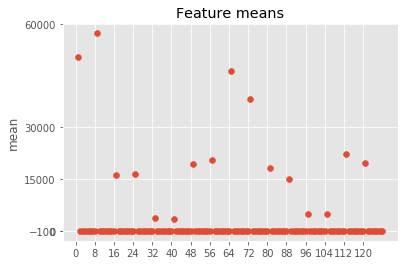

In [14]:
x_axis = list(range(1, 129))
fig, ax = plt.subplots()
# plot with evolution of the means
ax.scatter(x_axis, means)
ax.set_ylabel("mean")
ax.set_title("Feature means")
ax.set_xticks(list(range(0,128,8)))
ax.set_yticks([-100,0, 15000, 30000, 60000])
fig.savefig('pics/featuremeans.png', format='png', dpi=1200)

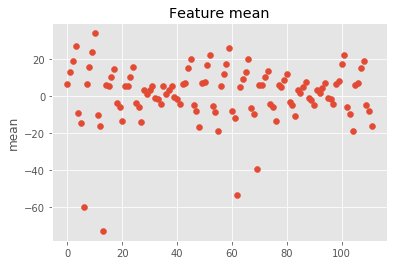

In [15]:
mean_low = [i for i in means if i < 100]
fig, ax = plt.subplots()
# plot with evolution of the standarddeviation
ax.scatter(list(range(0, len(mean_low))), mean_low)
ax.set_ylabel("mean")
ax.set_title("Feature mean")
fig.savefig('pics/featuremeanlow.png', format='png', dpi=1200)

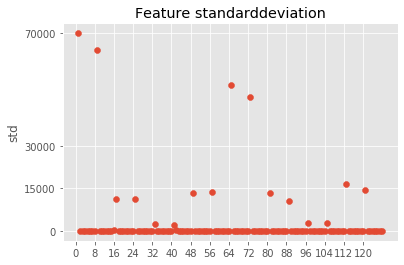

In [16]:
fig, ax = plt.subplots()
# plot with evolution of the standarddeviation
ax.scatter(x_axis, std)
ax.set_ylabel("std")
ax.set_title("Feature standarddeviation")
ax.set_xticks(list(range(0,128,8)))
ax.set_yticks([0, 15000, 30000, 70000])
fig.savefig('pics/featurestd.png', format='png', dpi=1200)

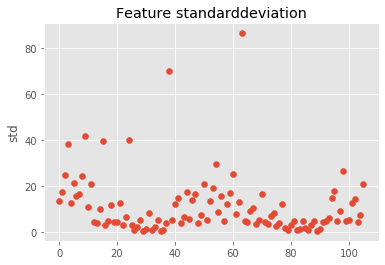

In [17]:
std_low = [i for i in std if i < 100]
fig, ax = plt.subplots()
# plot with evolution of the standarddeviation
ax.scatter(list(range(0, len(std_low))), std_low)
ax.set_ylabel("std")
ax.set_title("Feature standarddeviation")
fig.savefig('pics/featurestdlow.png', format='png', dpi=1200)

Plots with characteristics for particular gases.

In [18]:
# Create a plot with the gas means for each feature
gases = [ethanol, ethylene, ammonia, acetaldehyde, acetone, toluene]

# list initialization 
means = []
std = []
names = []
features = []

# Assign values to list
for name, df in zip(gases_name, gases):
    x = df.iloc[:,3:]
    means.extend(pd.DataFrame(x.describe()).iloc[1:2].values.tolist()[0])
    std.extend(pd.DataFrame(x.describe()).iloc[2:3].values.tolist()[0])
    features.extend(x.columns)
    names.extend([name for i in range(0, 128)])

# Create DataFrame 
summary_data = {'Name':names, "Feature": features, 'means':means, "std": std} 
df = pd.DataFrame(summary_data) 
df_subs = []
start = 0
for i in range(128, len(df), 128):
    df_subs.append(df[start:i])
    start = i

# for plot purpose
colors = ("red", "green", "blue", "cyan", "magenta", "black")
gases_name = ["ethanol", "ethylene", "ammonia", "acetaldehyde", "acetone", "toluene"]

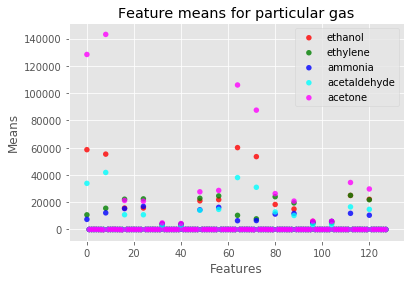

In [19]:
# plot 1
fig, ax = plt.subplots()

for df, color, group in zip(df_subs, colors, gases_name):
    x = list(range(128))
    y = df["means"]
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

ax.set_title('Feature means for particular gas')
ax.set_xlabel("Features")
ax.set_ylabel("Means")
ax.legend()
fig.savefig('pics/gasmeans.png', format='png', dpi=1200)

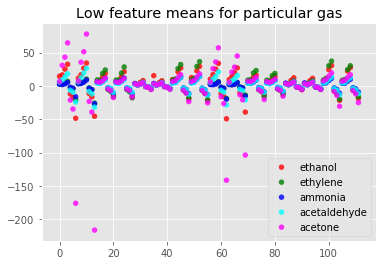

In [26]:
# plot 2
fig, ax = plt.subplots()

for df, color, group in zip(df_subs, colors, gases_name):
    y = [i for i in df["means"] if i <1000]
    x = list(range(len(y)))
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title("Low feature means for particular gas")
plt.legend()
plt.show()
fig.savefig('pics/gasmeanslow.png', format='png', dpi=1200)

**Identify outliers with IsolationForest** <br/>
* n_estimators: number of trees that will be created in the forest 
* max_samples: number of samples used to create each tree
* contamination: proportion of outliers that is expected in the dataset 
* max_features: number of features to draw from the data to train each base estimator.
<br/>
<br/>
The algorithm is quite sensitive to contamination. It refers to the expected proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples. If this parameter is set to 'auto', then the threshold value will be determined as in the original paper of Isolation Forest.
<br/>
<br/>
The algorithm will returns by default -1 for outliers and 1 for inliers. I changed this to 0 for inlier and 1 for outlier such that the sum results in the amount of outliers.

In [86]:
# Creation of the model without the gas feature and without the target variable
data = pd.concat(gases)
x = data.iloc[:,3:]

# create the isolation forest model 
model = IsolationForest(contamination= 'auto', random_state = 0, behaviour = "new").fit(x)

# lists containing the scores and the whether the observation is identified as outlier
scores = model.decision_function(x)
anomaly  = [0 if i == 1 else 1 for i in model.predict(x)]

# Dataframe containing all the observations that are identified as outliers
isolation_data = pd.DataFrame({'Observation':list(range(0, x.shape[0])), "scores": scores, "anomaly": anomaly})
indices_outliers = Isolation_data[Isolation_data["anomaly"] == 1].index
outlier_data = data.iloc[Indices_outliers]
outlier_amount = sum(isolation_data["anomaly"])
                     
print("The amount of outliers identified: {} wich is {}% of the data.".format(outlier_amount, round(outlier_amount/x.shape[0],2)))

The amount of outliers identified: 1387 wich is 0.1% of the data.


In [84]:
outlier_amount

1387

In [76]:
print("The outlier distribution of gases")
outlier_data["gas"].value_counts()

The outlier distribution of gases


Acetone         539
Ethylene        470
Ethanol         273
Ammonia          52
Acetaldehyde     30
Toluene          23
Name: gas, dtype: int64

In [75]:
print("The outlier distribution of concentrations:")
outlier_data["concentration"].value_counts()

The outlier distribution of concentrations:


250.0     248
225.0     133
1000.0    130
200.0     129
300.0     119
600.0     118
800.0     112
275.0      50
100.0      50
400.0      38
150.0      32
220.0      24
210.0      22
175.0      19
500.0      18
240.0      15
230.0      14
160.0      12
10.0       12
180.0      12
50.0       11
190.0      11
170.0      10
125.0       8
25.0        7
5.0         5
15.0        5
20.0        5
350.0       5
450.0       5
30.0        2
75.0        2
70.0        1
40.0        1
12.0        1
38.0        1
Name: concentration, dtype: int64